In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Hanna\escape_behavior_HannaJachna_2024-07-8\Tested_V2\coords_csv\CoordM1_P2_6_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Timestamp\M1_P2_6_17_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Audio\M1_P2_6_17_24_audio.wav'

north_pixel = 26
south_pixel = 462
east_pixel = 570
west_pixel = 101
shelter_x_pixel = 526
shelter_y_pixel = 263

platform_center_x = west_pixel + ((east_pixel-west_pixel)/2)
platform_center_y = north_pixel + ((south_pixel-north_pixel)/2)

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 77.61472700000087  #stimulus start time
stimulus_end = 85.22372700000088 #stimulus end time
escape_done = 78.5 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
#returns the converted shelter_x, shelter_y, x_diam, y_diam, and coord_scaled dataframe
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA.
#interpolate between NA values 
filter_data(.9, coord_scaled)

In [6]:

def filter_data(threshold, df):
    LT = threshold  # Threshold value
    
    # Apply filtering row-wise using .loc. Replace with NA
    df.loc[df['nose_likelihood'] < LT, ['nose_x', 'nose_y']] = np.nan
    df.loc[df['head_likelihood'] < LT, ['head_x', 'head_y']] = np.nan
    df.loc[df['center_likelihood'] < LT, ['center_x', 'center_y']] = np.nan
    
    '''
    #CHECK THIS - filling na values with interpolated values to fill gap in graphs
    df['nose_x'] = df['nose_x'].interpolate()
    df['nose_y'] = df['nose_y'].interpolate()
    df['head_x'] = df['head_x'].interpolate()
    df['head_y'] = df['head_y'].interpolate()
    df['center_x'] = df['center_x'].interpolate()
    df['center_y'] = df['center_y'].interpolate()
    '''

In [7]:
filter_data(.9, coord_scaled)

In [8]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.002304,NaN,NaN,0.007881,-32.256254,-33.758411,...,0.000154,NaN,NaN,0.000984,-0.368560,-33.753230,0.000232,-31.801712,-2.779479,0.000429
1,1,1,NaN,NaN,0.002186,NaN,NaN,0.007302,-32.048573,-33.735439,...,0.000132,NaN,NaN,0.000881,-0.366051,-33.726802,0.000204,-31.801712,-2.682284,0.000533
2,2,2,NaN,NaN,0.002492,NaN,NaN,0.007340,-0.631891,-33.735439,...,0.000176,NaN,NaN,0.001321,-0.284118,-33.706370,0.000246,-31.801712,-2.682284,0.000499
3,3,3,NaN,NaN,0.003733,NaN,NaN,0.009248,-0.631891,-33.735439,...,0.000254,NaN,NaN,0.001999,-0.284118,-33.702073,0.000345,-31.806286,-2.682284,0.000381
4,4,4,NaN,NaN,0.003244,NaN,NaN,0.009526,-0.631891,-33.735439,...,0.000198,NaN,NaN,0.001384,-0.284118,-33.702073,0.000303,-31.830944,-2.682284,0.000419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,4397,4397,NaN,NaN,0.003184,NaN,NaN,0.007111,-32.282949,-3.253922,...,0.000274,NaN,NaN,0.001534,-0.415928,-33.704013,0.000421,-31.862245,-2.473122,0.001070
4398,4398,4398,NaN,NaN,0.002695,NaN,NaN,0.006290,-32.283041,-3.253922,...,0.000259,NaN,NaN,0.001490,-0.415928,-33.712897,0.000386,-31.886856,-2.473122,0.001896
4399,4399,4399,NaN,NaN,0.003953,NaN,NaN,0.007301,-32.290666,-3.253922,...,0.000369,NaN,NaN,0.002234,-0.374259,-33.716621,0.000551,-31.886856,-2.473122,0.001672
4400,4400,4400,NaN,NaN,0.002491,NaN,NaN,0.006297,-32.296084,-3.281369,...,0.000268,NaN,NaN,0.001351,-0.374259,-33.759605,0.000392,-31.892843,-2.473122,0.001076


In [9]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.002304,NaN,NaN,0.007881,-32.256254,-33.758411,...,0.000154,NaN,NaN,0.000984,-0.368560,-33.753230,0.000232,-31.801712,-2.779479,0.000429
1,1,1,NaN,NaN,0.002186,NaN,NaN,0.007302,-32.048573,-33.735439,...,0.000132,NaN,NaN,0.000881,-0.366051,-33.726802,0.000204,-31.801712,-2.682284,0.000533
2,2,2,NaN,NaN,0.002492,NaN,NaN,0.007340,-0.631891,-33.735439,...,0.000176,NaN,NaN,0.001321,-0.284118,-33.706370,0.000246,-31.801712,-2.682284,0.000499
3,3,3,NaN,NaN,0.003733,NaN,NaN,0.009248,-0.631891,-33.735439,...,0.000254,NaN,NaN,0.001999,-0.284118,-33.702073,0.000345,-31.806286,-2.682284,0.000381
4,4,4,NaN,NaN,0.003244,NaN,NaN,0.009526,-0.631891,-33.735439,...,0.000198,NaN,NaN,0.001384,-0.284118,-33.702073,0.000303,-31.830944,-2.682284,0.000419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,4397,4397,NaN,NaN,0.003184,NaN,NaN,0.007111,-32.282949,-3.253922,...,0.000274,NaN,NaN,0.001534,-0.415928,-33.704013,0.000421,-31.862245,-2.473122,0.001070
4398,4398,4398,NaN,NaN,0.002695,NaN,NaN,0.006290,-32.283041,-3.253922,...,0.000259,NaN,NaN,0.001490,-0.415928,-33.712897,0.000386,-31.886856,-2.473122,0.001896
4399,4399,4399,NaN,NaN,0.003953,NaN,NaN,0.007301,-32.290666,-3.253922,...,0.000369,NaN,NaN,0.002234,-0.374259,-33.716621,0.000551,-31.886856,-2.473122,0.001672
4400,4400,4400,NaN,NaN,0.002491,NaN,NaN,0.006297,-32.296084,-3.281369,...,0.000268,NaN,NaN,0.001351,-0.374259,-33.759605,0.000392,-31.892843,-2.473122,0.001076


In [10]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [11]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [12]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [13]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [15]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [16]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [17]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

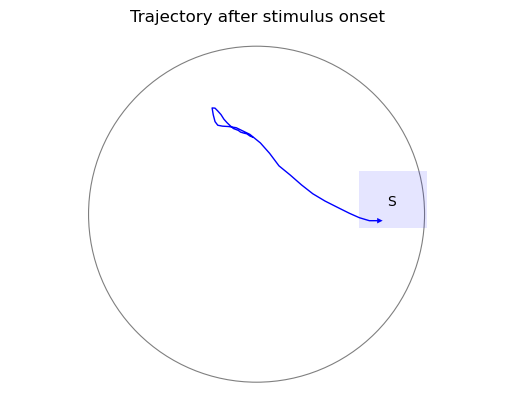

In [18]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

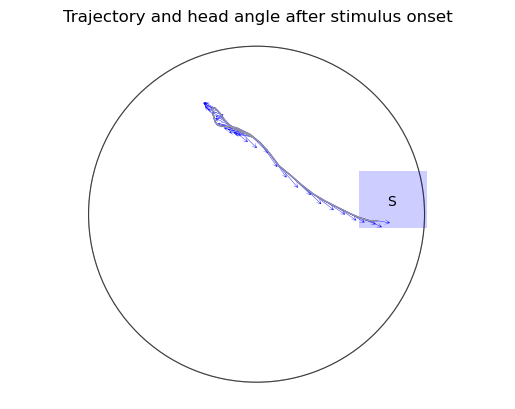

In [19]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

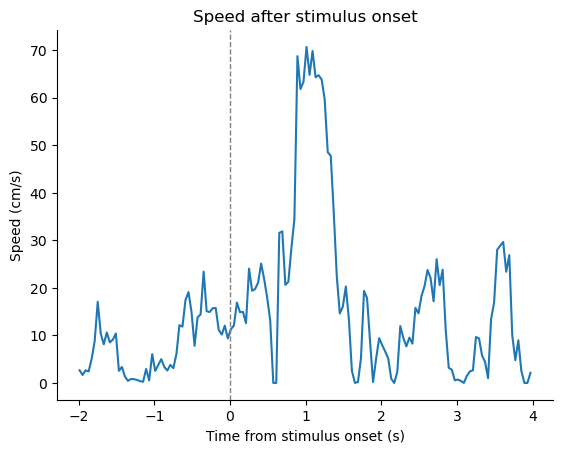

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

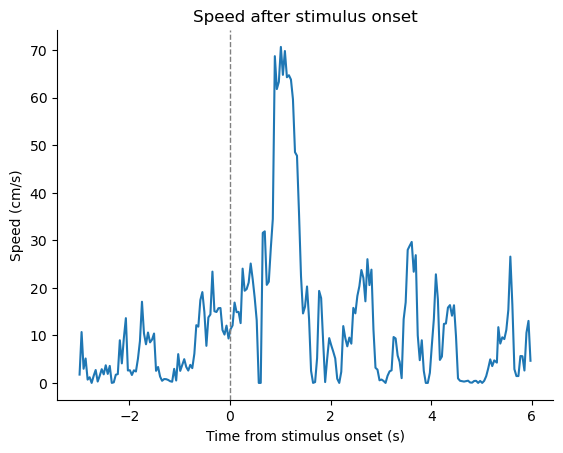

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

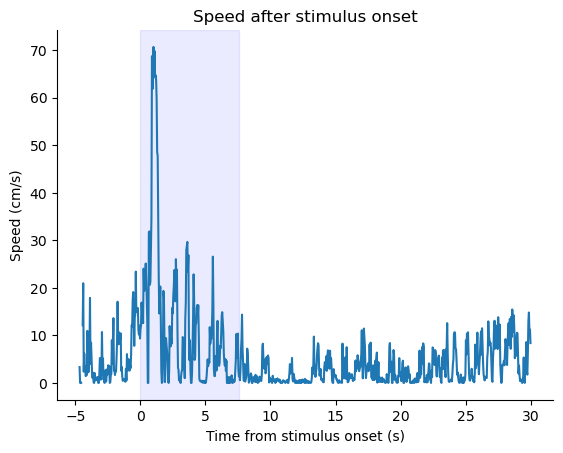

In [22]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

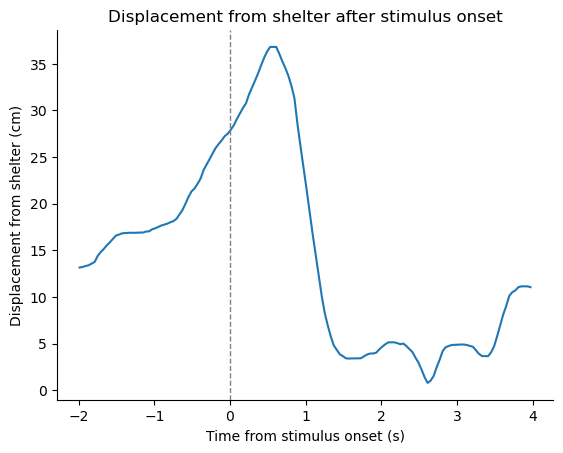

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

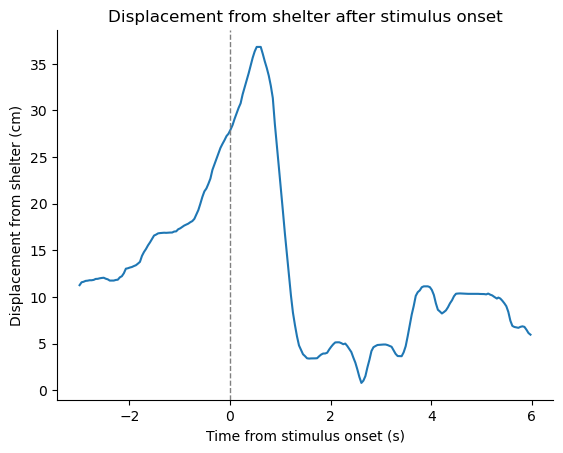

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

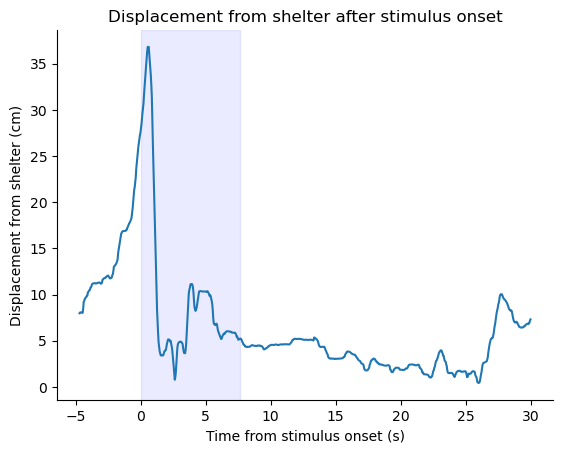

In [25]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

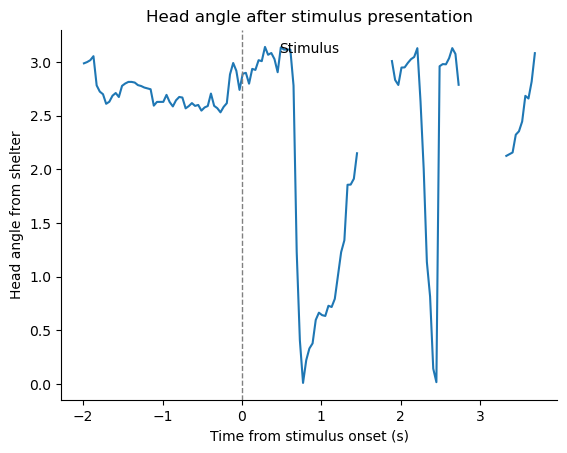

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

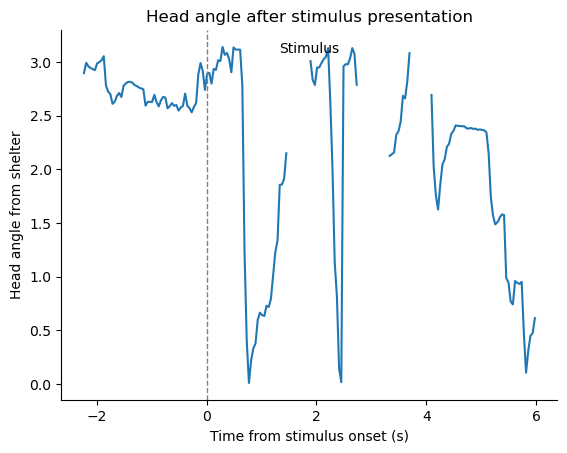

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

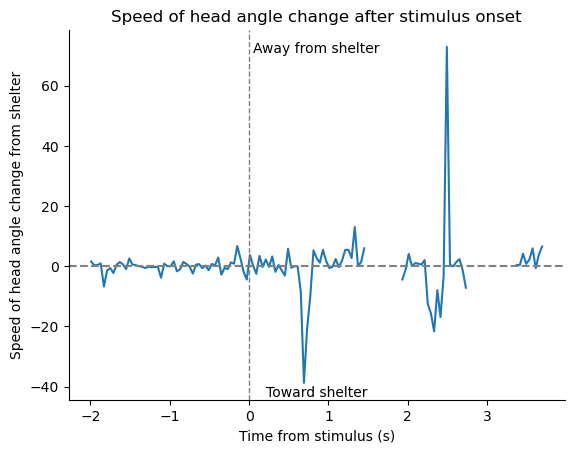

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
1927,1927,1927,-5.216114,16.170851,0.999828,-3.610156,15.870668,0.999990,-3.977640,15.165081,...,3.049859,12.620333,0.999995,77.098138,0.010684,27.949360,11.307641,0.453459,2.890765,3.753351
1928,1928,1928,-5.598232,16.450522,0.999861,-4.077812,16.150454,0.999956,-4.447471,15.425308,...,2.595484,12.822676,0.999998,77.138176,0.050722,28.433482,12.093648,0.484205,2.899065,0.207304
1929,1929,1929,-6.228749,16.708832,0.999070,-4.589454,16.547140,0.999977,-4.989168,15.811755,...,2.126277,12.970185,0.999996,77.178048,0.090594,29.094451,16.907177,0.674123,2.798137,-2.531289
1930,1930,1930,-6.576550,17.169204,0.999635,-5.106197,16.814318,0.999990,-5.551776,16.224934,...,1.665869,12.977486,0.999991,77.218036,0.130582,29.679561,14.892535,0.595523,2.936029,3.448320
1931,1931,1931,-7.006097,17.556548,0.999819,-5.514568,17.203233,0.999994,-5.944481,16.553160,...,0.913710,13.009850,0.999997,77.258048,0.170594,30.273739,14.946793,0.598051,2.926534,-0.237299
1932,1932,1932,-7.412106,17.926706,0.999960,-5.862952,17.406469,0.999983,-6.275070,16.797359,...,0.229180,13.163805,0.999998,77.298240,0.210786,30.765678,12.582173,0.505703,3.016974,2.250203
1933,1933,1933,-7.996159,18.483696,0.999687,-6.581285,18.011813,0.999991,-7.122006,17.465425,...,-0.557638,13.345565,0.999997,77.338176,0.250722,31.724509,24.048085,0.960384,3.008203,-0.219632
1934,1934,1934,-8.389920,19.389761,0.999850,-7.024034,18.699387,0.999989,-7.630156,18.254629,...,-1.419379,13.577283,0.999998,77.378906,0.291452,32.479004,19.397322,0.790053,3.140778,3.254984
1935,1935,1935,-8.498649,20.042413,0.999123,-7.445086,19.392071,0.999998,-8.054856,18.909821,...,-2.144075,14.230315,0.999939,77.418087,0.330633,33.210223,19.747085,0.773711,3.067552,-1.868918
1936,1936,1936,-9.146250,20.651621,0.999166,-8.063085,19.997411,0.999995,-8.568893,19.528499,...,-2.715863,15.158749,0.999989,77.458356,0.370902,33.992155,21.112905,0.850196,3.084035,0.409328


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
1964,1964,1964,NaN,NaN,0.791233,27.313584,-0.542288,0.999989,27.365732,0.362945,...,19.862869,-0.927599,0.999995,78.578356,1.490902,3.648406,16.045590,0.641422,NaN,NaN
1965,1965,1965,NaN,NaN,0.118839,28.056538,-0.245072,0.999979,27.923473,0.495902,...,20.663778,-0.963705,0.999996,78.618407,1.530953,3.418435,20.294478,0.812814,NaN,NaN
1966,1966,1966,NaN,NaN,0.140552,28.324747,-0.198834,0.999967,28.331899,0.629687,...,21.482588,-0.964403,0.999998,78.658829,1.571375,3.386458,13.378892,0.540802,NaN,NaN
1967,1967,1967,NaN,NaN,0.054209,28.459495,-0.198834,0.999901,28.437846,0.632473,...,21.490729,-1.011060,0.999998,78.698407,1.610953,3.403109,2.545535,0.100747,NaN,NaN
1968,1968,1968,NaN,NaN,0.027374,28.459495,-0.161519,0.999880,28.437846,0.698843,...,21.490729,-1.041411,0.999997,78.738381,1.650927,3.403109,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2122,2122,NaN,NaN,0.005608,27.692058,8.313120,0.975740,27.412894,9.033834,...,20.963804,6.441727,0.999999,84.899892,7.812438,4.860274,14.371315,0.575039,NaN,NaN
2123,2123,2123,NaN,NaN,0.006022,27.850479,7.905132,0.933413,27.769181,8.697526,...,21.137002,6.612369,0.999999,84.940058,7.852604,4.770415,7.124634,0.286168,NaN,NaN
2124,2124,2124,NaN,NaN,0.013821,27.884725,7.832732,0.973157,27.810096,8.413107,...,21.137002,6.622334,0.999999,84.981069,7.893615,4.585260,4.521295,0.185423,NaN,NaN
2125,2125,2125,NaN,NaN,0.021691,27.911970,7.565908,0.994020,27.914677,8.335442,...,21.150132,6.622334,0.999999,85.020058,7.932604,4.562887,0.574705,0.022407,NaN,NaN


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

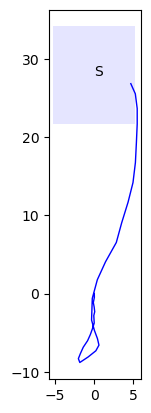

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


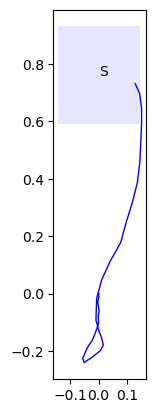

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

